In [ ]:
##@Author: Gemma Gordon
##@Date: July 2022
## Script to determine the correlation between CDR-H3 loop length and the concavity of the epitope in a given Ab-Ag complex

### compare H3 loop length vs concavity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

In [2]:
plt.rcParams['figure.dpi'] = 1200

load in henriette summary datasets with CDR3 data

In [3]:
nbs_summary = pd.read_csv('Dataset_sdAbs_summary.csv')
abs_summary = pd.read_csv('Dataset_flAbs_summary.csv')

In [4]:
nbs_summary = nbs_summary[['pdb', 'cdr_sequence']]
abs_summary = abs_summary[['pdb', 'cdr_sequence']]

extract just cdr3 from columns and get length

In [5]:
def get_cdr(summary_df, cdr_col):

    cdrhs = []
    lengths = []
    for row in summary_df['cdr_sequence']:
        row = ast.literal_eval(row)
        cdrh3 = row[cdr_col]
        cdrhs.append(cdrh3)
        lengths.append(len(cdrh3))
    
    return cdrhs, lengths

In [6]:
nbs_seqs, nbs_lengths = get_cdr(nbs_summary, 'CDRH3')
abs_seqs, abs_lengths = get_cdr(abs_summary, 'CDRH3')

In [7]:
abs_df = pd.DataFrame()
abs_df['pdb'] = abs_summary['pdb']
abs_df['cdrh3 seq'] = abs_seqs
abs_df['cdrh3 len'] = abs_lengths

In [8]:
nbs_df = pd.DataFrame()
nbs_df['pdb'] = nbs_summary['pdb']
nbs_df['cdrh3 seq'] = nbs_seqs
nbs_df['cdrh3 len'] = nbs_lengths

drop from abs the PDB id we know we don't have results for 

In [9]:
abs_df = abs_df.drop(labels=[852, 83])

In [10]:
len(abs_df)

890

load in VD results

In [11]:
nbs_vd = pd.read_csv('Nbs_VD_results_final.csv')
abs_vd = pd.read_csv('Abs_VD_results/Abs_VD_results_final_under1A.csv')

add mean VD result to df with cdr3 loop data, matching on pdb id

In [12]:
nbs_vd_means = nbs_vd[['pdb', 'mean_VD', 'positive vs negative']]
abs_vd_means = abs_vd[['pdb', 'mean_VD', 'positive vs negative']]

In [13]:
abs_df = abs_df.sort_values(by='pdb').reset_index()
nbs_df = nbs_df.sort_values(by='pdb').reset_index()

In [14]:
abs_df

,index,pdb,cdrh3 seq,cdrh3 len
0,259,1ahw,ARDNSYYFDY,10
1,540,1ar1,VRHEYYYAMDY,11
2,237,1bgx,ARYYYGYWYFDV,12
3,291,1bj1,AKYPHYYGSSHWYFDV,16
4,498,1cz8,AKYPYYYGTSHWYFDV,16
...,...,...,...,...
885,820,7shy,ARGSHYFGHWHFAV,14
886,445,7shz,ARGSHYFGHWHFAV,14
887,18,7tn0,ARDYTRGAWFGESLIGGFDN,20
888,17,7tn0,ARGDSSGYYYYFDY,14


In [15]:
abs_vd_means = abs_vd_means.sort_values(by='pdb').reset_index()
nbs_vd_means = nbs_vd_means.sort_values(by='pdb').reset_index()

In [16]:
abs_results = pd.concat([abs_df.sort_values(by='pdb'), abs_vd_means.sort_values(by='pdb')], axis=1)
nbs_results = pd.concat([nbs_df.sort_values(by='pdb'), nbs_vd_means.sort_values(by='pdb')], axis=1)

In [113]:
nbs_results.columns

Index(['index', 'pdb', 'cdrh3 seq', 'cdrh3 len', 'index', 'pdb', 'mean_VD',
       'positive vs negative'],
      dtype='object')

In [114]:
nbs_results.head()

,index,pdb,cdrh3 seq,cdrh3 len,index,pdb,mean_VD,positive vs negative
0,47,1kxq,ATGNSVRLASWEGYFY,16,284,1kxq,-2.016745,"{'positive VD %': 0.21710526315789475, 'negati..."
1,114,1kxt,AAGPGSGKLVVAGRTCYGPNY,21,269,1kxt,-1.512496,"{'positive VD %': 0.308411214953271, 'negative..."
2,174,1kxv,KPSLRYGLPGCPIIP,15,279,1kxv,-1.904726,"{'positive VD %': 0.24489795918367346, 'negati..."
3,43,1mel,AADSTIYASYYECGHGLSTGGYGYDS,26,174,1mel,-1.940006,"{'positive VD %': 0.28160919540229884, 'negati..."
4,166,1op9,AATEVAGWPLDIGIYDY,17,3,1op9,-1.331048,"{'positive VD %': 0.32323232323232326, 'negati..."


In [115]:
len(nbs_results)

345

In [116]:
len(abs_results)

890

In [117]:
abs_results.columns

Index(['index', 'pdb', 'cdrh3 seq', 'cdrh3 len', 'index', 'pdb', 'mean_VD',
       'positive vs negative'],
      dtype='object')

get negative proportion values

In [17]:
def get_neg(df):

    neg_props = []
    for row in df['positive vs negative']:
        row = ast.literal_eval(row)
        neg_prop = row['negative VD %']
        neg_props.append(neg_prop)
    
    return neg_props

In [18]:
nbs_negs = get_neg(nbs_results)
nbs_results['neg_props'] = nbs_negs

In [19]:
abs_negs = get_neg(abs_results)
abs_results['neg_props'] = abs_negs

In [58]:
abs_results.columns

Index(['level_0', 'index', 'pdb', 'cdrh3 seq', 'cdrh3 len', 'index', 'pdb',
       'mean_VD', 'positive vs negative', 'neg_props'],
      dtype='object')

plot results for loop length vs concavity

Abs results

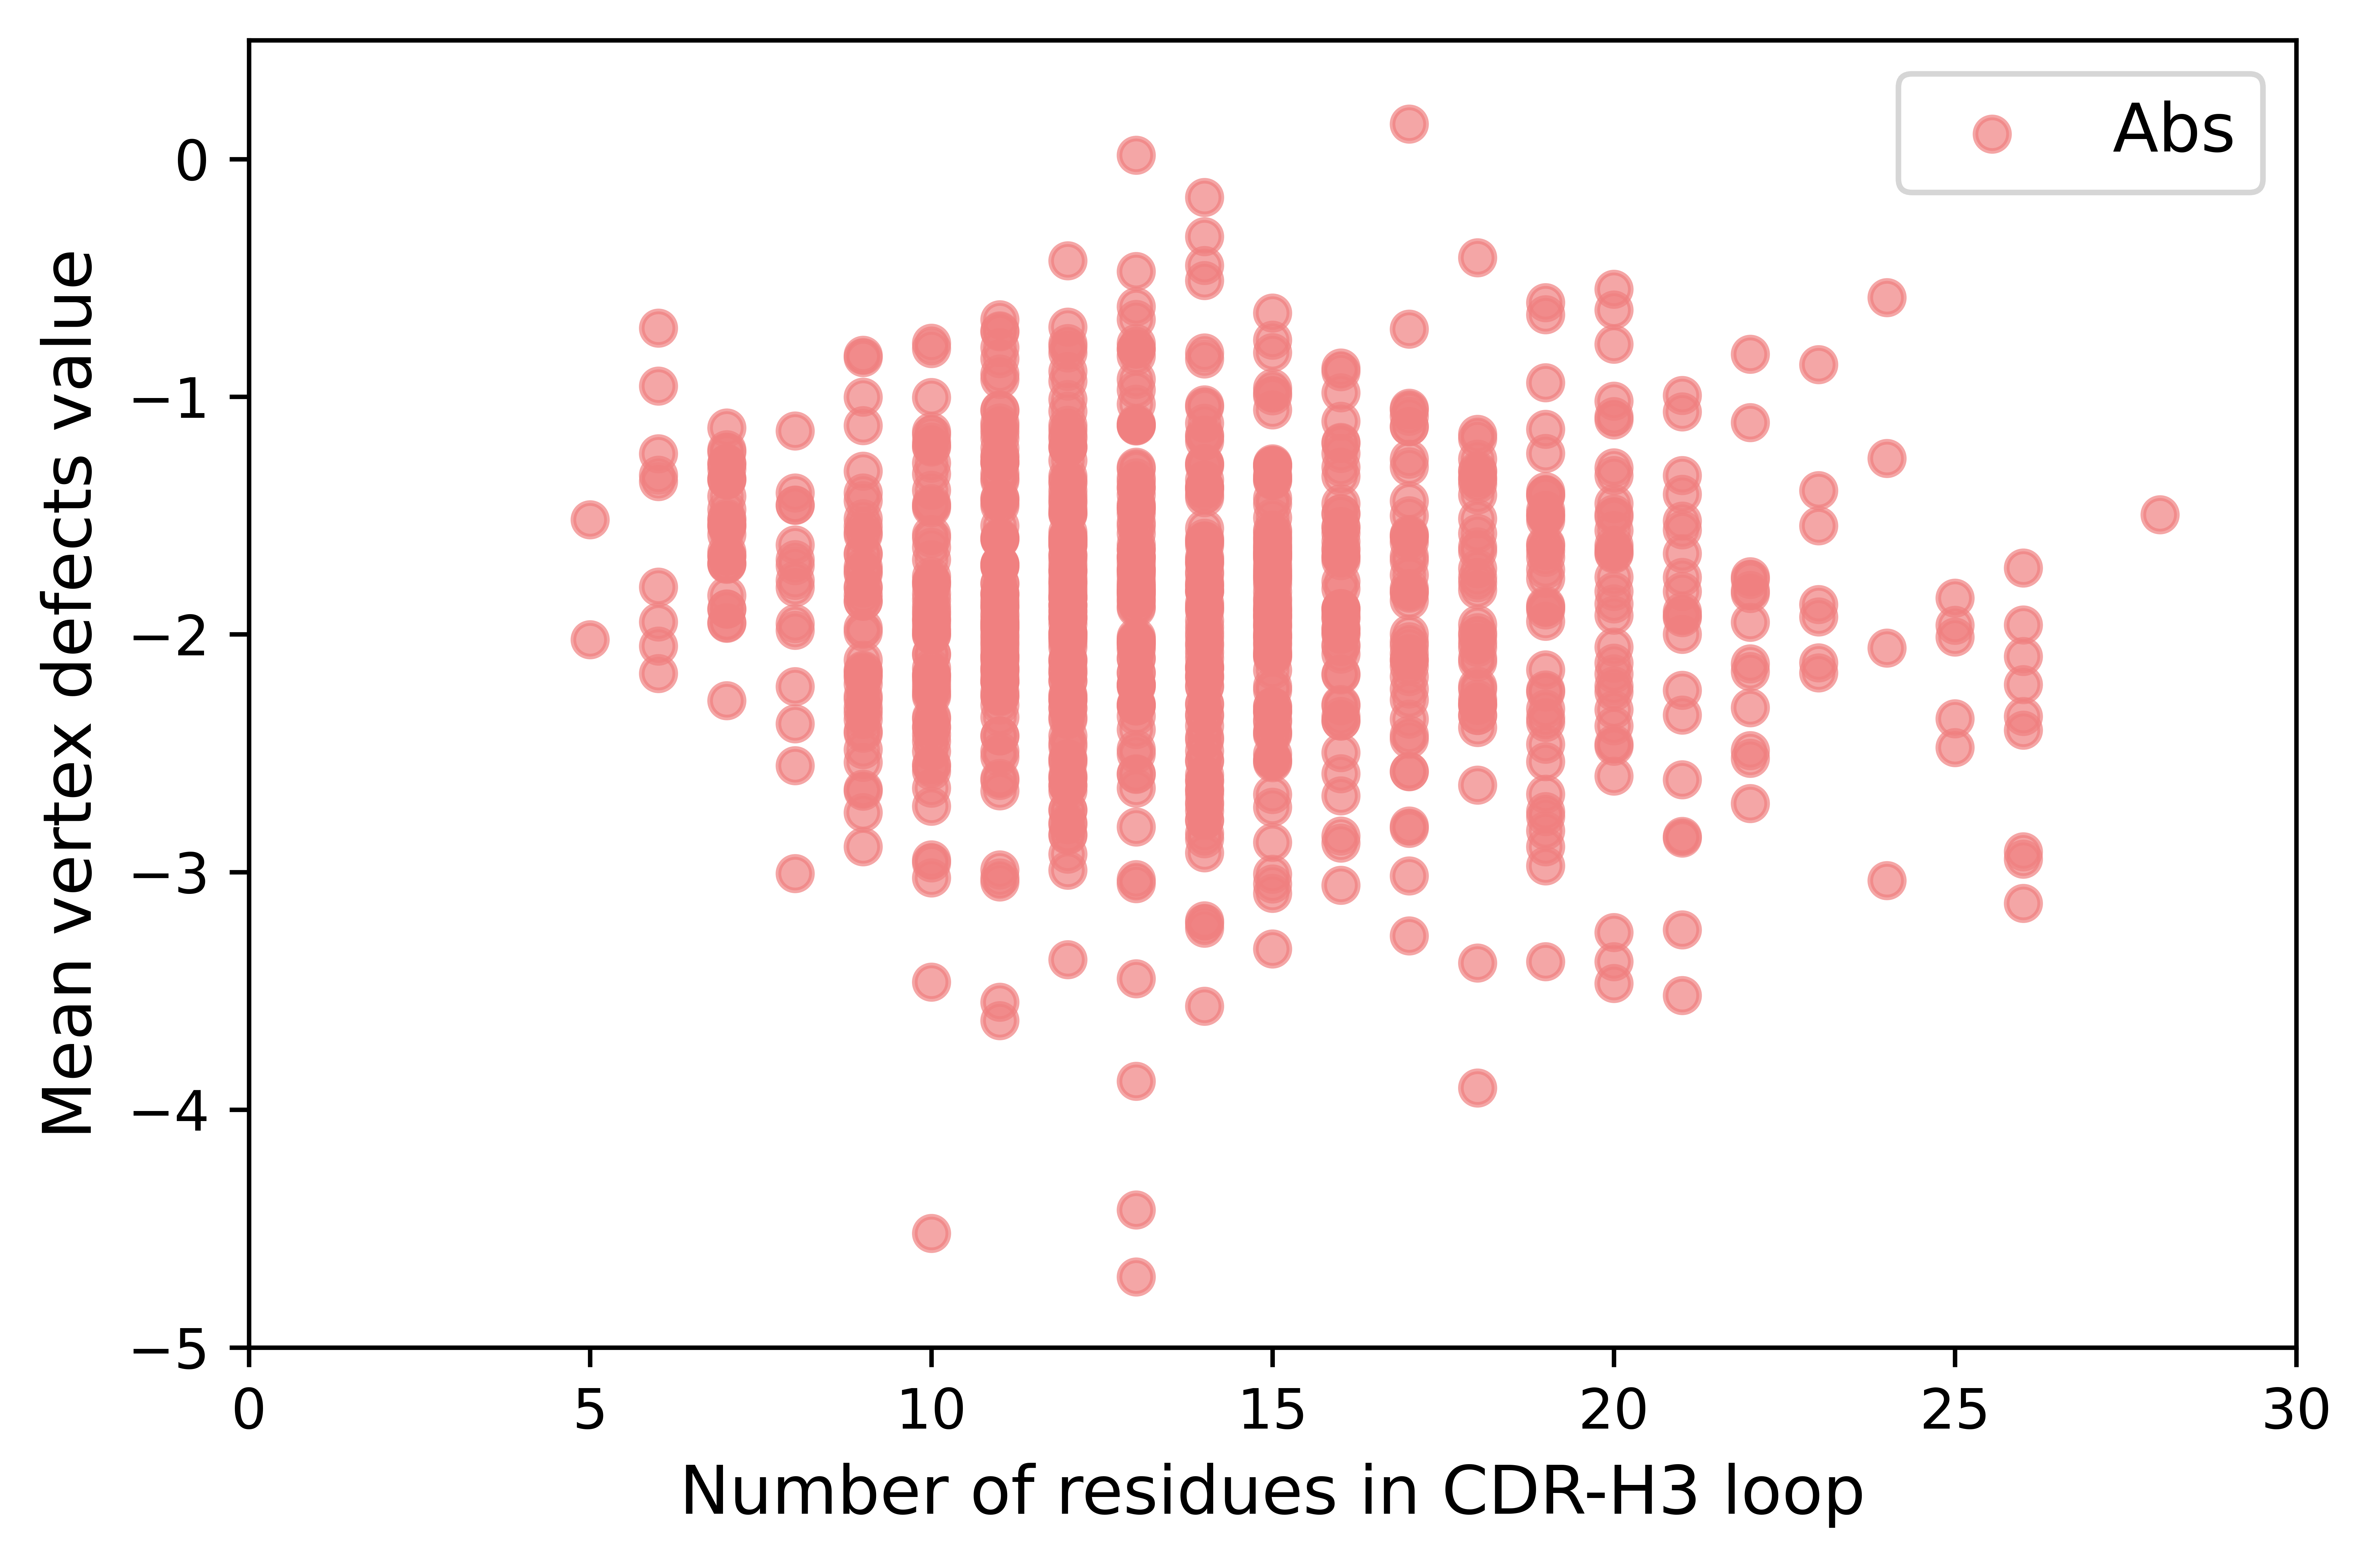

In [20]:
plt.figure()
plt.scatter(abs_results['cdrh3 len'], abs_results['mean_VD'], label='Abs', color='lightcoral', alpha=0.7)
plt.xlabel('Number of residues in CDR-H3 loop', fontsize=12)
plt.ylabel('Mean vertex defects value', fontsize=12)
plt.xlim(0,30,5)
plt.ylim(-5,0.5, 0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

Nbs results

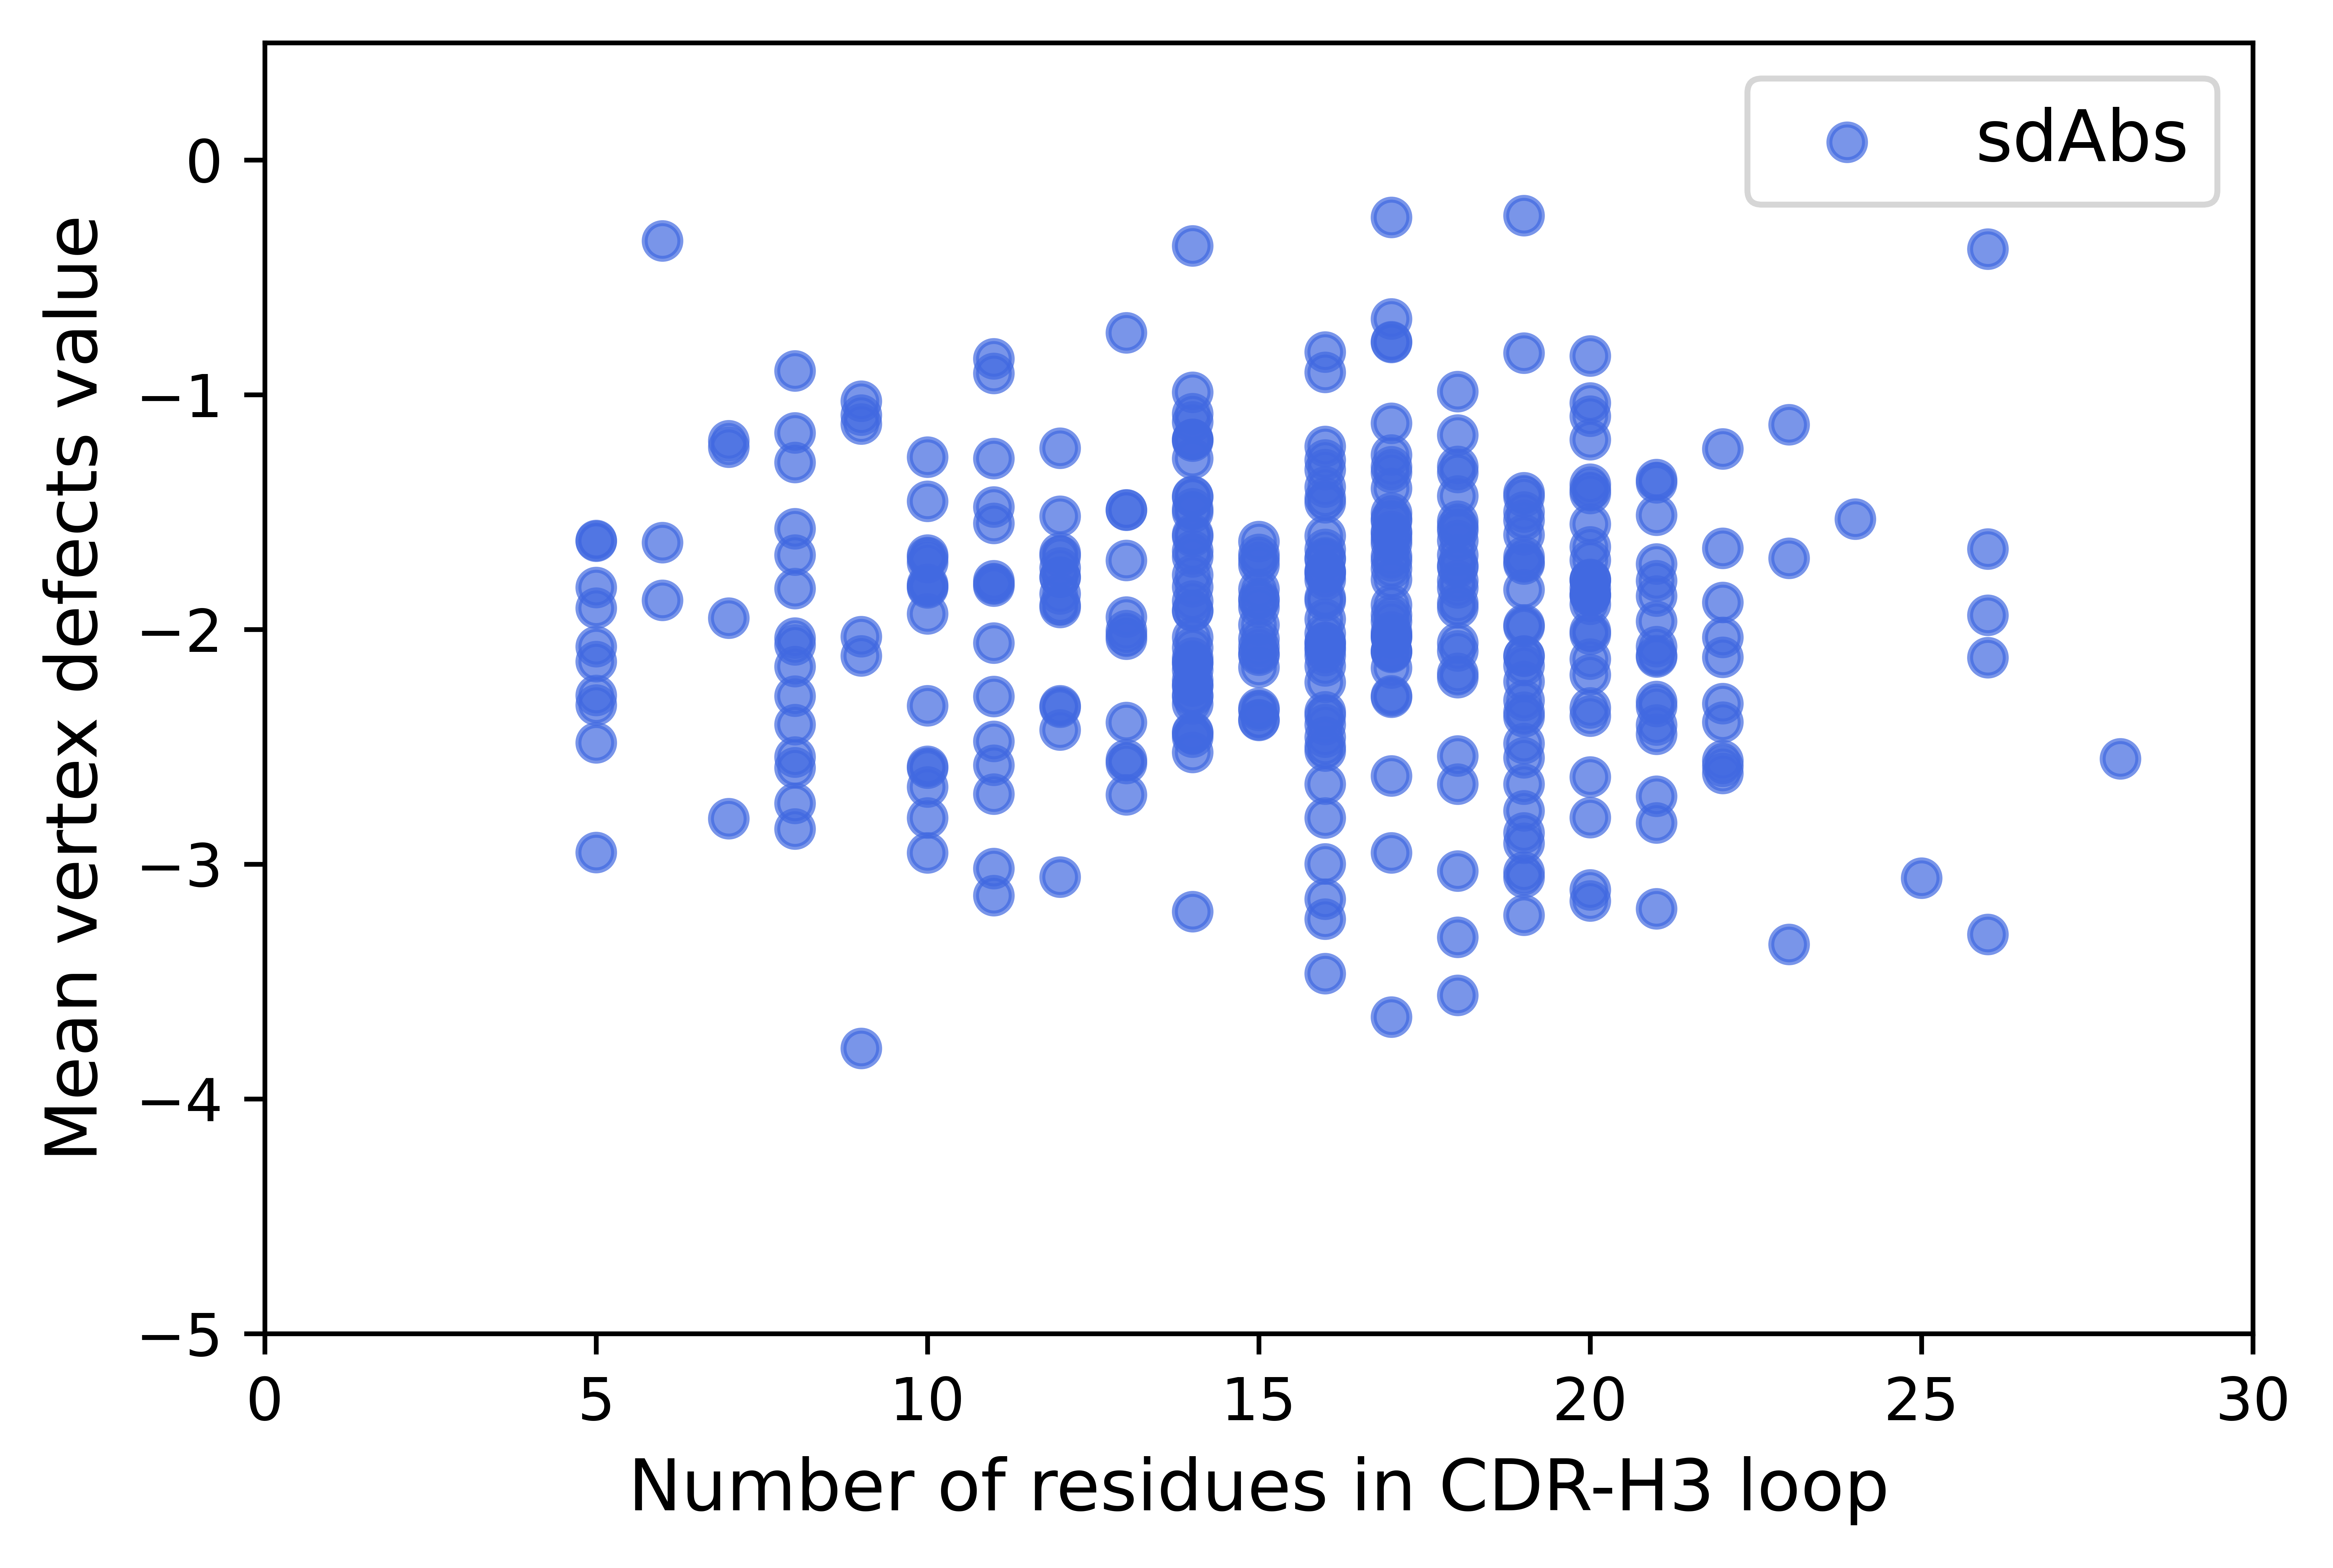

In [21]:
plt.figure()
plt.scatter(nbs_results['cdrh3 len'], nbs_results['mean_VD'], label='sdAbs', color='royalblue', alpha=0.7)
plt.xlabel('Number of residues in CDR-H3 loop', fontsize=12)
plt.ylabel('Mean vertex defects value', fontsize=12)
plt.xlim(0,30,5)
plt.ylim(-5,0.5, 0.5)
plt.legend(fontsize=12)
plt.show()

In [62]:
nbs_results['cdrh3 len'].corr(nbs_results['mean_VD'], method='pearson')


-0.01634233821546786

In [63]:
abs_results['cdrh3 len'].corr(abs_results['mean_VD'], method='pearson')

-0.06921193321619519

In [64]:
nbs_results2['mean_VD'].describe()

count    343.000000
mean      -1.954417
std        0.606161
min       -3.785527
25%       -2.326586
50%       -1.907252
75%       -1.595344
max       -0.237301
Name: mean_VD, dtype: float64

In [65]:
nbs_results2['cdrh3 len'].describe()

count    343.000000
mean      15.504373
std        4.498779
min        5.000000
25%       13.000000
50%       16.000000
75%       19.000000
max       28.000000
Name: cdrh3 len, dtype: float64

In [66]:
abs_results['mean_VD'].describe()

count    890.000000
mean      -1.886372
std        0.619483
min       -5.106457
25%       -2.234721
50%       -1.872423
75%       -1.494314
max        0.147101
Name: mean_VD, dtype: float64

In [67]:
abs_results['cdrh3 len'].describe()

count    890.000000
mean      13.933708
std        4.015029
min        5.000000
25%       11.000000
50%       13.000000
75%       16.000000
max       28.000000
Name: cdrh3 len, dtype: float64

In [68]:
from scipy import stats

In [69]:
stats.mannwhitneyu(nbs_results['cdrh3 len'], abs_results['cdrh3 len'])

MannwhitneyuResult(statistic=192428.0, pvalue=4.02108620348381e-12)

plot negative VD proportions against loop length

In [97]:
nbs_results.columns

Index(['Unnamed: 0', 'pdb', 'cdrh3 seq', 'cdrh3 len', 'mean_VD'], dtype='object')

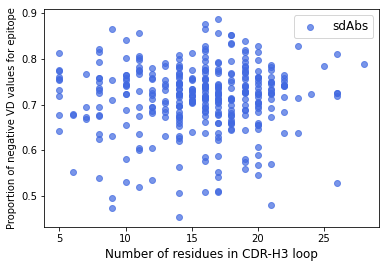

In [129]:
plt.figure()
plt.scatter(nbs_results['cdrh3 len'], nbs_results['neg_props'], label='sdAbs', color='royalblue', alpha=0.7)
plt.xlabel('Number of residues in CDR-H3 loop', fontsize=12)
plt.ylabel('Proportion of negative VD values for epitope', fontsize=10)
plt.legend(fontsize=12)
plt.show()

In [71]:
nbs_results['cdrh3 len'].corr(nbs_results['neg_props'], method='pearson')

0.009332048119654324

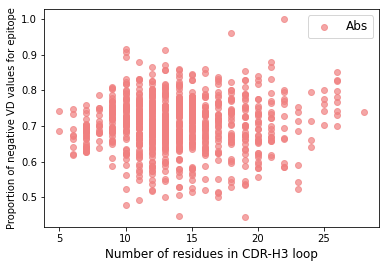

In [128]:
plt.figure()
plt.scatter(abs_results['cdrh3 len'], abs_results['neg_props'], label='Abs', color='lightcoral', alpha=0.7)
plt.xlabel('Number of residues in CDR-H3 loop', fontsize=12)
plt.ylabel('Proportion of negative VD values for epitope', fontsize=10)
plt.legend(fontsize=12)
plt.show()

In [73]:
abs_results['cdrh3 len'].corr(abs_results['neg_props'], method='pearson')

0.035657981280860084

get structures for pymol figures

In [74]:
abs_results.loc[abs_results['cdrh3 len'] == np.max(abs_results['cdrh3 len'])]

,level_0,index,pdb,cdrh3 seq,cdrh3 len,index,pdb,mean_VD,positive vs negative,neg_props
771,771,583,7jie,ARDRVPSYSPSRRFSTKGAMWGKYGMDV,28,731,7jie,-1.496472,"{'positive VD %': 0.26, 'negative VD %': 0.74}",0.74


In [75]:
abs_results.loc[abs_results['cdrh3 len'] == np.min(abs_results['cdrh3 len'])]

,level_0,index,pdb,cdrh3 seq,cdrh3 len,index,pdb,mean_VD,positive vs negative,neg_props
76,76,341,2q8a,TLSHF,5,442,2q8a,-2.021935,"{'positive VD %': 0.2565789473684211, 'negativ...",0.743421
480,480,220,5yy5,TNTYY,5,784,5yy5,-1.517127,"{'positive VD %': 0.31496062992125984, 'negati...",0.685039


In [76]:
nbs_results.loc[nbs_results['cdrh3 len'] == np.max(nbs_results['cdrh3 len'])]

,level_0,index,pdb,cdrh3 seq,cdrh3 len,index,pdb,mean_VD,positive vs negative,neg_props
143,143,209,5o03,AADLSSLTTVQAMCVIPRPGFSAKAYDY,28,25,5o04,-2.550676,"{'positive VD %': 0.21212121212121213, 'negati...",0.787879


In [77]:
nbs_results.loc[nbs_results['cdrh3 len'] == np.min(nbs_results['cdrh3 len'])]

,level_0,index,pdb,cdrh3 seq,cdrh3 len,index,pdb,mean_VD,positive vs negative,neg_props
30,30,274,3zkx,IYNGH,5,154,3zkx,-2.950280,"{'positive VD %': 0.22608695652173913, 'negati...",0.773913
31,31,342,4bel,TSAGR,5,204,4bel,-2.482759,"{'positive VD %': 0.18691588785046728, 'negati...",0.813084
95,96,343,5c3l,ANQYG,5,120,5c3l,-1.909592,"{'positive VD %': 0.35714285714285715, 'negati...",0.642857
96,95,233,5c3l,ANQYG,5,320,5dmj,-2.321414,"{'positive VD %': 0.2396694214876033, 'negativ...",0.760331
124,124,2,5l21,NVGEF,5,133,5lhn,-2.281355,"{'positive VD %': 0.24561403508771928, 'negati...",0.754386
219,219,298,6oq7,KGPEL,5,13,6oq7,-1.620443,"{'positive VD %': 0.28125, 'negative VD %': 0....",0.718750
235,235,68,6ssi,NVGAS,5,186,6ssi,-2.137406,"{'positive VD %': 0.2682926829268293, 'negativ...",0.731707
286,286,122,7d5u,TSAGR,5,33,7d2z,-1.623844,"{'positive VD %': 0.3238095238095238, 'negativ...",0.676190
310,313,344,7lzp,NSGPY,5,188,7lvw,-3.342260,"{'positive VD %': 0.17307692307692307, 'negati...",0.826923
313,311,111,7lzp,NSGPY,5,244,7lzp,-2.073160,"{'positive VD %': 0.2247191011235955, 'negativ...",0.775281
